### Noise and cluster size

Centroid: $\hat{\xi} \in \{-1,1\}^{N}$

Noise parameter: $\Delta \xi \in(0,1)$, each neuron in the input layer independently flip with probability $\frac{\Delta \xi}{2}$

cluster size on cortical layer:

$\Delta m = \langle\sum_{j=1}^{N_c}|m^n_j-\bar{m}^n_j|\rangle / [2N_cf(1-f)]$

In [2]:
from mix_forward import mix_forward
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from tqdm import tqdm_notebook
display.set_matplotlib_formats('svg')

In [3]:
def cal_deltaC(matrix_C,f=0.5):
    res = 0.
    Nr,Nc = matrix_C.shape
    center = matrix_C[0,:]
    
    for i in range(1,Nr):
        
        res = res + np.abs(matrix_C[i,:]-center).sum()
    
    return res/(2*Nc*f*(1-f)*(Nr-1))

In [ ]:
test = mix_forward(Nm,N,M,P,K,Nc)
C_test = test.order_m(6,initial_data=True)
cal_deltaC(C_test)

#### 1. Add noise to stimulus layer, 6 modalities

In [6]:
P = 1000
K = 1
N = 100
M = 100
Nm = 6
Nc = 1000
delta_xi_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]

In [7]:

#sparsity = 0.5
record1 = np.zeros((10,7,6))
record1_h = np.zeros((10,7,6))

for repeat in tqdm_notebook(range(10)):
    
    for i in range(7):
        model_6_noise = mix_forward(Nm,N,M,P,K,Nc,delta_xi=delta_xi_list[i])
        model_6_noise.generate_input()
        
        for m in range(1,7):
            Cm,h = model_6_noise.order_m(m,return_h=True)
            record1[repeat,i,m-1] = cal_deltaC(Cm)
            record1_h[repeat,i,m-1] = cal_covh(h)

In [22]:
# sparsity = 0.01
record2 = np.zeros((7,6))

for i in tqdm_notebook(range(7)):
    model_6_noise = mix_forward(Nm,N,M,P,K,Nc,delta_xi=delta_xi_list[i])
    model_6_noise.generate_input()
    
    for m in range(1,7):
        
        record2[i,m-1] = cal_deltaC(model_6_noise.order_m(m,f=0.01),f=0.01)  

In [9]:
record1_mean = np.mean(record1,axis=0)
record1h_mean = np.mean(record1_h,axis=0)

In [13]:
record1_mean.shape

(7, 6)

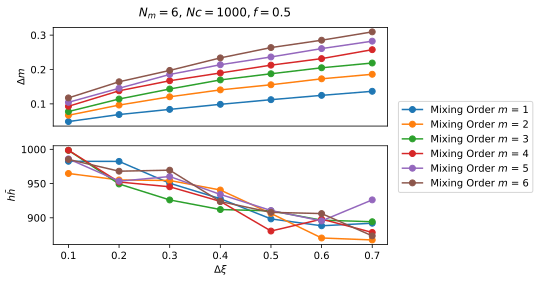

In [42]:
display.set_matplotlib_formats('svg')
fig,axs = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.2)
for i in range(6):
    axs[0].plot(delta_xi_list,record1_mean[:,i].reshape(-1),'o-',label = r'Mixing Order $m$ = {}'.format(i+1))
    
#axs[0].set_xlabel(r'$\Delta \xi$')
axs[0].set_xticks([])
axs[0].set_ylabel(r'$\Delta m$')
#axs[0].legend()


for i in range(6):
    axs[1].plot(delta_xi_list,record1h_mean[:,i].reshape(-1),'o-',label = r'Mixing Order $m$ = {}'.format(i+1))
    
axs[1].set_xlabel(r'$\Delta \xi$')
axs[1].set_ylabel(r'$h\bar{h}$')
axs[1].legend(bbox_to_anchor=[1.45,1.5])

plt.suptitle(r'$N_m =6$, $Nc= 1000, f=0.5$',x=0.5,y=0.95)
plt.show()

#### 2. Add noise to context modality

In [37]:
P = 1
K = 4
N = 100
M = 100
Nm = 6
Nc = 1100
delta_phi_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]

In [ ]:
#sparsity = 0.5
record3 = np.zeros((7,6))

for i in tqdm_notebook(range(7)):
    model_6_noise = mix_forward(Nm,N,M,P,K,Nc,delta_phi=delta_phi_list[i])
    model_6_noise.generate_input()
    
    for m in range(1,7):
        
        record3[i,m-1] = cal_deltaC(model_6_noise.order_m(m))      

In [39]:
#sparsity = 0.01
record4 = np.zeros((7,6))

for i in tqdm_notebook(range(7)):
    model_6_noise = mix_forward(Nm,N,M,P,K,Nc,delta_phi=delta_phi_list[i])
    model_6_noise.generate_input()
    
    for m in range(1,7):
        
        record4[i,m-1] = cal_deltaC(model_6_noise.order_m(m,f=0.01),f=0.01)  

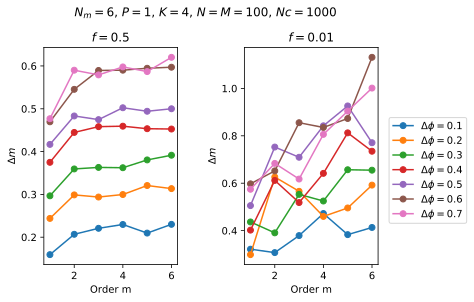

In [40]:
display.set_matplotlib_formats('svg')
fig,axs = plt.subplots(1,2,)
plt.subplots_adjust(wspace=0.5)
for i in range(7):
    axs[0].plot(range(1,7),record3[i,:],'o-',label = r'$\Delta \phi = {}$'.format(delta_phi_list[i]))
    
axs[0].set_xlabel('Order m')
axs[0].set_ylabel('$\Delta m$')
axs[0].legend(bbox_to_anchor=(3.2, 0.7))
axs[0].set_title(r'$f = 0.5$')

for i in range(7):
    axs[1].plot(range(1,7),record4[i,:],'o-',label = r'$\Delta \phi = {}$'.format(delta_phi_list[i]))
    
axs[1].set_xlabel('Order m')
axs[1].set_ylabel('$\Delta m$')
#axs[1].legend()
axs[1].set_title(r'$f = 0.01$')

plt.suptitle(r'$N_m =6$, $P=1$, $K=4$, $N=M=100$, $Nc= 1000$',y=1.02)
plt.show()

### 3. Relation to sparsity f

In [23]:
P = 1000
K = 1
N = 100
M = 100
Nm = 6
Nc = 1000
delta_xi = 0.5

In [24]:
record5_2 = np.zeros((10,6,40))

model_6_noise = mix_forward(Nm,N,M,P,K,Nc,delta_xi=delta_xi)
model_6_noise.generate_input()
    
for repeat in tqdm_notebook(range(10)):
    
    flist = 10**np.linspace(-3,-0.3,40)
    
    for m in range(1,7):
        
        for i,f in enumerate(flist):
            
            record5_2[repeat,m-1,i] = cal_deltaC(model_6_noise.order_m(m,f=f),f=f)  

In [45]:
record5_all = np.vstack((record5,record5_2))

In [46]:
record5_all.shape

(20, 6, 40)

In [47]:
record5_mean = np.mean(record5_all,axis=0)

In [48]:
record5_mean.shape

(6, 40)

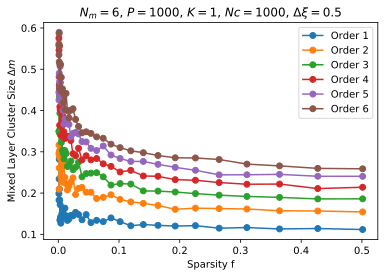

In [49]:
for m in range(1,7):
    plt.plot(flist,record5_mean[m-1,:],'-o',label=r'Order {}'.format(m))

plt.xlabel('Sparsity f')
plt.ylabel(r'Mixed Layer Cluster Size $\Delta m$')
#plt.xscale('log')
plt.legend()
plt.title(r'$N_m =6$, $P=1000$, $K=1$, $Nc= 1000$, $\Delta \xi = 0.5$')
plt.show()

In [3]:
P = 1000
K = 1
N = 100
M = 100
Nm = 3
Nc = 1000
delta_xi = 0.5

In [4]:
record5_3 = np.zeros((20,3,40))

model_3_noise = mix_forward(Nm,N,M,P,K,Nc,delta_xi=delta_xi)
model_3_noise.generate_input()
    
for repeat in tqdm_notebook(range(20)):
    
    flist = 10**np.linspace(-3,-0.3,40)
    
    for m in range(1,4):
        
        for i,f in enumerate(flist):
            
            record5_3[repeat,m-1,i] = cal_deltaC(model_3_noise.order_m(m,f=f),f=f)  

In [5]:
record5_mean_3 = np.mean(record5_3,axis=0)

In [6]:
record5_mean_3.shape

(3, 40)

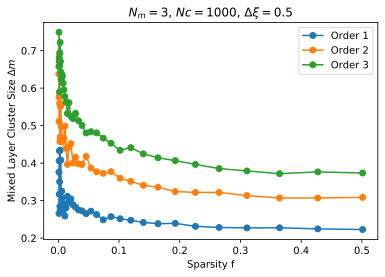

In [7]:
display.set_matplotlib_formats('svg')
for m in range(1,4):
    plt.plot(flist,record5_mean_3[m-1,:],'-o',label=r'Order {}'.format(m))

plt.xlabel('Sparsity f')
plt.ylabel(r'Mixed Layer Cluster Size $\Delta m$')
#plt.xscale('log')
plt.legend()
plt.title(r'$N_m =3$, $Nc= 1000$, $\Delta \xi = 0.5$')
plt.show()

#### Try h

In [8]:
P = 1000
K = 1
N = 100
M = 100
Nm = 3
Nc = 1000
delta_xi_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]

In [4]:
def cal_covh(matrix_h):
    res = 0.
    Nr,Nc = matrix_h.shape
    center = matrix_h[0,:]
    
    for i in range(1,Nr):
        
        res = res + np.dot(center,matrix_h[i,:])
    
    return res/float(Nr)

In [10]:
record5_4 = np.zeros((20,3,7))
f = 0.5
    
for repeat in tqdm_notebook(range(20)):
    
    for i,delta_xi in enumerate(delta_xi_list):
        
        model_3_noise = mix_forward(Nm,N,M,P,K,Nc,delta_xi=delta_xi)
        model_3_noise.generate_input()
        
        for m in range(1,4):
            
            record5_4[repeat,m-1,i] = cal_covh(model_3_noise.order_m(m,f=f,return_h=True)[1])  

In [11]:
record5_mean_4 = np.mean(record5_4,axis=0)

In [18]:
def theorey_hcov(Nc,N,M,delta_xi):
    return Nc*(1-delta_xi/3)

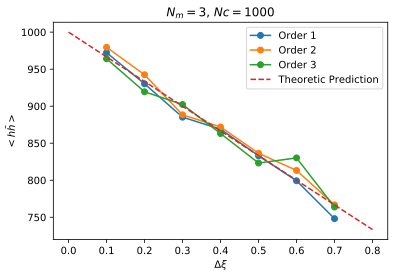

In [22]:
display.set_matplotlib_formats('svg')
for m in range(1,4):
    plt.plot(delta_xi_list,record5_mean_4[m-1,:],'-o',label=r'Order {}'.format(m))

plt.plot(np.linspace(0.00,0.8,20),[theorey_hcov(Nc,N,M,i) for i in np.linspace(0.00,0.8,20)],'--',label='Theoretic Prediction')
plt.xlabel(r'$\Delta \xi$')
plt.ylabel(r'$<h\bar{h}>$')
#plt.xscale('log')
plt.legend()
plt.title(r'$N_m =3$, $Nc= 1000$')
plt.show()

In [25]:
record5_mean_4[0,:].mean()/record5_mean_4[2,:].mean()

3.0066396340145785

In [26]:
record5_mean_4[0,:].mean()/record5_mean_4[1,:].mean()

1.99528331471599

### Excess overlap

Overlap definition:

$O^{m,n}=\sum_{j=1}^{N_c}\bar{C}^m_j\bar{C}^n_j/N_c = f^2 + r^{m,n} $

$\langle(r^{m,n})^2\rangle = f^2(1-f)^2(\frac{1}{N_c}+\frac{Q^2}{N_s})$  for a fixed J

In [17]:
def cal_excessQ(matrix_C,f,Ns):
    
    Nr,Nc = matrix_C.shape
    r_mn = []
    
    for m in range(int(Nr)):
        for n in range(m+1,int(Nr)):
            temp_rmn = np.mean((matrix_C[m,:]-f)*(matrix_C[n,:]-f))
            r_mn.append(temp_rmn)
    r_mn = np.array(r_mn)
    r_mn_square = r_mn**2
    Q = np.sqrt((r_mn_square.mean() / (f**2*(1-f)**2))*Ns)
    return Q

In [18]:
# test of excess_Q calculation, create a truly random matrix
test_h = np.random.randn(40,5000)
test_m = mix_forward.fix_sparsity(_,test_h,f=0.3)
cal_excessQ(test_m,0.3,100)

0.14361733432064283

#### 1. Excess Overlap -- Nc

In [20]:
P = 100
K = 1
N = 100
M = 100
Nm = 1
Nc_list2 = [2000]

In [21]:

for Nc in tqdm_notebook(Nc_list2):
    
    model1_f_Nc = mix_forward(Nm,N,M,P,K,Nc)
    model1_f_Nc.generate_input()
    
    locals()['Q_'+str(int(Nc))] = []
    
    flist = 10**np.linspace(-4,-0.3,50)
        
    for f in flist:
        temp_C = model1_f_Nc.order_m(1,f=f)
        Q = cal_excessQ(temp_C,f=f,Ns=N)
        locals()['Q_'+str(int(Nc))].append(Q)

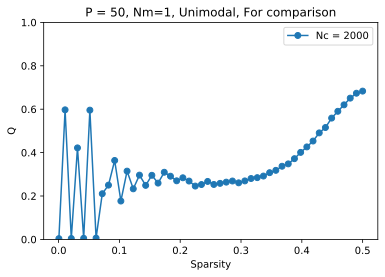

In [23]:
display.set_matplotlib_formats('svg')
for Nc in Nc_list2:
    flist = np.linspace(1,int(Nc/2),50)/Nc    
    plt.plot(flist,locals()['Q_'+str(int(Nc))],'o-',label = 'Nc = {}'.format(Nc))

plt.legend()
#plt.xscale('log')
plt.xlabel('Sparsity')
plt.ylabel('Q')
plt.ylim(0,1)
plt.title('P = 50, Nm=1, Unimodal, For comparison')
plt.show()

In [123]:
Nc = 4000
model1_f_Nc = mix_forward(Nm,N,M,P,K,Nc)
model1_f_Nc.generate_input()
    
locals()['Q2_'+str(int(Nc))] = []
    
flist = np.linspace(1,50,50)/Nc
        
for f in tqdm_notebook(flist):
    temp_C = model1_f_Nc.order_m(1,f=f)
    Q,dQ = cal_excessQ(temp_C,f=f,Ns=N)
    locals()['Q2_'+str(int(Nc))].append(Q)

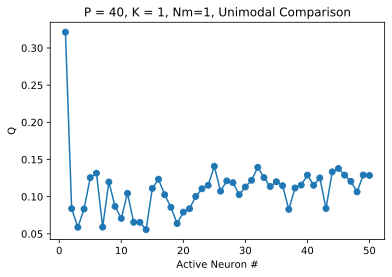

In [125]:
plt.plot(flist*4000,Q2_4000,'-o')
plt.xlabel('Active Neuron #')
plt.ylabel('Q')
plt.title('P = 40, K = 1, Nm=1, Unimodal Comparison')
plt.show()

#### 2. MultiModal

In [127]:
P = 40
K = 1
N = 100
M = 100
Nm = 6
Nc = 4000

In [129]:
recordQ_1 = np.zeros((6,50))

model_6_Q = mix_forward(Nm,N,M,P,K,Nc)
model_6_Q.generate_input()

flist = np.linspace(1,2000,50)/4000

for m in tqdm_notebook(range(1,7)):
    
    for i,f in enumerate(flist):
        temp_C = model_6_Q.order_m(m,f=f)
        Q,dQ = cal_excessQ(temp_C,f=f,Ns=N)
        recordQ_1[m-1,i] = Q

/Users/liminhuan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


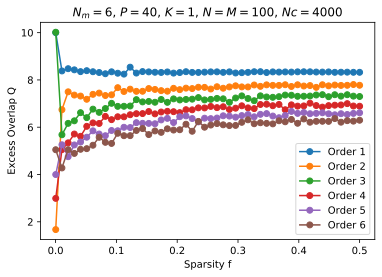

In [130]:
for m in range(1,7):
    plt.plot(flist,recordQ_1[m-1,:],'-o',label=r'Order {}'.format(m))

plt.xlabel('Sparsity f')
plt.ylabel(r'Excess Overlap Q')
#plt.xscale('log')
plt.legend()
plt.title(r'$N_m =6$, $P=40$, $K=1$, $N=M=100$, $Nc= 4000$')
plt.show()

In [132]:
P = 40
K = 1
N = 100
M = 100
Nm = 6
Nc = 40

In [133]:
recordQ_2 = np.zeros((6,20))

model_6_Q = mix_forward(Nm,N,M,P,K,Nc)
model_6_Q.generate_input()

flist = np.linspace(1,20,20)/40

for m in tqdm_notebook(range(1,7)):
    
    for i,f in enumerate(flist):
        temp_C = model_6_Q.order_m(m,f=f)
        Q,dQ = cal_excessQ(temp_C,f=f,Ns=N)
        recordQ_2[m-1,i] = Q

/Users/liminhuan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


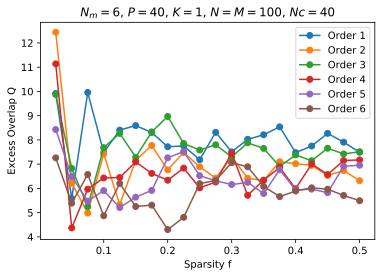

In [134]:
for m in range(1,7):
    plt.plot(flist,recordQ_2[m-1,:],'-o',label=r'Order {}'.format(m))

plt.xlabel('Sparsity f')
plt.ylabel(r'Excess Overlap Q')
#plt.xscale('log')
plt.legend()
plt.title(r'$N_m =6$, $P=40$, $K=1$, $N=M=100$, $Nc= 40$')
plt.show()

#### 3. Large P,K, Large Nc

In [140]:
P = 40
K = 5
N = 100
M = 100
Nm = 3
Nc = 1000

In [142]:
recordQ_3 = np.zeros((3,50))

model_3_Q = mix_forward(Nm,N,M,P,K,Nc)
model_3_Q.generate_input()

flist = 10**np.linspace(-3,-0.7,50)

for m in tqdm_notebook(range(1,4)):
    
    for i,f in enumerate(flist):
        temp_C = model_3_Q.order_m(m,f=f)
        Q,dQ = cal_excessQ(temp_C,f=f,Ns=N)
        recordQ_3[m-1,i] = Q

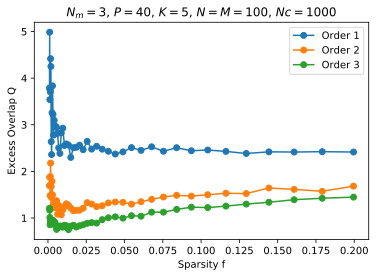

In [143]:
for m in range(1,4):
    plt.plot(flist,recordQ_3[m-1,:],'-o',label=r'Order {}'.format(m))

plt.xlabel('Sparsity f')
plt.ylabel(r'Excess Overlap Q')
#plt.xscale('log')
plt.legend()
plt.title(r'$N_m =3$, $P=40$, $K=5$, $N=M=100$, $Nc=1000$')
plt.show()

In [144]:
P = 1000
K = 1
N = 100
M = 100
Nm = 6
Nc = 1000

In [145]:
recordQ_4 = np.zeros((6,50))

model_6_Q = mix_forward(Nm,N,M,P,K,Nc)
model_6_Q.generate_input()

flist = 10**np.linspace(-3,-0.7,50)

for m in tqdm_notebook(range(1,7)):
    
    for i,f in enumerate(flist):
        temp_C = model_6_Q.order_m(m,f=f)
        Q,dQ = cal_excessQ(temp_C,f=f,Ns=N)
        recordQ_4[m-1,i] = Q

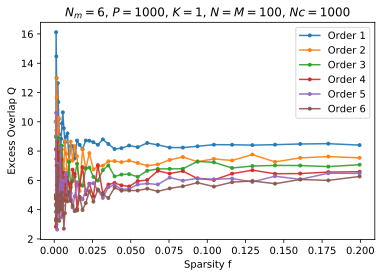

In [155]:
for m in range(1,7):
    plt.plot(flist,recordQ_4[m-1,:],'.-',label=r'Order {}'.format(m),alpha=0.9)

plt.xlabel('Sparsity f')
plt.ylabel(r'Excess Overlap Q')
#plt.xscale('log')
plt.legend()
plt.title(r'$N_m =6$, $P=1000$, $K=1$, $N=M=100$, $Nc=1000$')
plt.show()

In [160]:
P = 32
K = 2
N = 100
M = 100
Nm = 6
Nc = 1000

In [161]:
recordQ_5 = np.zeros((6,50))

model_6_Q = mix_forward(Nm,N,M,P,K,Nc)
model_6_Q.generate_input()

flist = 10**np.linspace(-3,-0.7,50)

for m in tqdm_notebook(range(1,7)):
    
    for i,f in enumerate(flist):
        temp_C = model_6_Q.order_m(m,f=f)
        Q,dQ = cal_excessQ(temp_C,f=f,Ns=N)
        recordQ_5[m-1,i] = Q

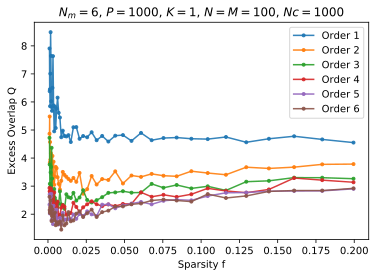

In [162]:
for m in range(1,7):
    plt.plot(flist,recordQ_5[m-1,:],'.-',label=r'Order {}'.format(m),alpha=0.9)

plt.xlabel('Sparsity f')
plt.ylabel(r'Excess Overlap Q')
#plt.xscale('log')
plt.legend()
plt.title(r'$N_m =6$, $P=1000$, $K=1$, $N=M=100$, $Nc=1000$')
plt.show()